In [121]:
import numpy as np
import os
import seaborn as sns
import scipy.stats as stat
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data
import warnings
warnings.filterwarnings("ignore")
import acquire as acq
import prepare as prep

Print first three rows

In [4]:
df_iris = data('iris')
iris.head()

NameError: name 'iris' is not defined

In [5]:
df_iris.shape

(150, 5)

In [6]:
df_iris.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

In [7]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [8]:
df_iris.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
df_iris.describe().T

,count,mean,std,min,25%,50%,75%,max
Sepal.Length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
Sepal.Width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
Petal.Length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
Petal.Width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [102]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357' 

csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
csv_export_url

'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/export?format=csv&gid=341089357'

In [69]:
df_google = pd.read_csv(csv_export_url)
df_google.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [70]:
df_google.shape

(891, 12)

In [71]:
df_google.columns.to_list()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [72]:
df_google.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [33]:
df_google.describe().Age

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [35]:
df_google.describe().Fare

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [37]:
df_google.nunique().Survived

2

In [42]:
print(df_google.Survived.unique())

[0 1]


In [46]:
print(pd.unique(df_google['Survived']))

[0 1]


In [96]:
for col in df_google.columns:
    if df_google[col].dtype == 'object':
        print(f"{col} has {df_google[col].nunique()} unique values.")

Name has 891 unique values.
Sex has 2 unique values.
Ticket has 681 unique values.
Cabin has 147 unique values.
Embarked has 3 unique values.


In [57]:
df_google.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [51]:
df_excel = pd.read_excel("train.xlsx", sheet_name="train")
df_excel.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [54]:
df_excel_sample = df_excel.head(101)
df_excel_sample.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [98]:
df_excel.shape[0]

891

In [74]:
for col in df_excel.columns:
    print(col)

PassengerId
Survived
Pclass
Name
Sex
Age
SibSp
Parch
Ticket
Fare
Cabin
Embarked


In [75]:
for i, col in enumerate(df_excel.columns):
    if i >= 5:
        break
    print(col)

PassengerId
Survived
Pclass
Name
Sex


In [97]:
df_excel.columns[0:5]

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex'], dtype='object')

In [77]:
for col in df_excel.columns:
    if df_excel[col].dtype == 'object':
        print(col)

Name
Sex
Ticket
Cabin
Embarked


In [99]:
df_excel.select_dtypes('object').columns.to_list()

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [100]:
df_excel.select_dtypes('object').head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S


In [101]:
df_excel.select_dtypes(exclude='object').head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [103]:
df_excel[['Age', 'Fare']].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [83]:
# Replace 'column_name' with the desired numeric column name
column_name = 'Age'

# Calculate the range
min_value = df_excel[column_name].min()
max_value = df_excel[column_name].max()
column_range = max_value - min_value

print(f"Range of {column_name}: {column_range} ({min_value}-{max_value})")

Range of Age: 79.58 (0.42-80.0)


In [84]:
# Replace 'column_name' with the desired numeric column name
column_name = 'Fare'

# Calculate the range
min_value = df_excel[column_name].min()
max_value = df_excel[column_name].max()
column_range = max_value - min_value

print(f"Range of {column_name}: {column_range} ({min_value}-{max_value})")

Range of Fare: 512.3292 (0.0-512.3292)


In [2]:
import env

In [124]:
def new_titanic_data(SQL_query):
    """
    This function will:
    - take in a SQL_query
    - create a connection_url to mySQL
    - return a df of the given query from the titanic_db
    """
    url = get_db_url('titanic_db')
    
    return pd.read_sql(SQL_query, url)

In [125]:
def get_titanic_data(SQL_query, directory, filename = 'titanic.csv'):
    """
    This function will:
    - Check local directory for csv file
        - return if exists
    - if csv doesn't exist:
        - creates df of sql query
        - writes df to csv
    - outputs titanic df
    """
    
    
    if os.path.exists(directory+filename): 
        df = pd.read_csv(filename)
        return df
    else:
        df = new_titanic_data(SQL_query)

        df.to_csv(filename)
        return df

In [85]:
titanic_query = "select * from passengers"
directory = os.getcwd()

In [89]:
titanic_df = acq.get_titanic_data(titanic_query)

In [91]:
titanic_df.head()

,Unnamed: 0,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [10]:
def new_iris_data(SQL_query):
    """
    This function will:
    - take in a SQL_query
    - create a connection_url to mySQL
    - return a df of the given query from the iris_db
    """
    url = get_db_url('iris_db')
    
    return pd.read_sql(SQL_query, url)

In [11]:
def get_iris_data(SQL_query, filename = 'iris.csv'):
    """
    This function will:
    - Check local directory for csv file
        - return if exists
    - if csv doesn't exist:
        - creates df of sql query
        - writes df to csv
    - outputs iris df
    """
    if os.path.exists(directory+filename): 
        df = pd.read_csv(filename)
        return df
    else:
        df = new_iris_data(SQL_query)

        df.to_csv(filename)
        return df

In [12]:
iris_query = """
            SELECT 
                species_id,
                species_name,
                sepal_length,
                sepal_width,
                petal_length,
                petal_width
            FROM measurements
            JOIN species USING(species_id)            
"""

iris_df = acq.get_iris_data(iris_query)
iris_df.head()

,Unnamed: 0,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,0,1,setosa,5.1,3.5,1.4,0.2
1,1,1,setosa,4.9,3.0,1.4,0.2
2,2,1,setosa,4.7,3.2,1.3,0.2
3,3,1,setosa,4.6,3.1,1.5,0.2
4,4,1,setosa,5.0,3.6,1.4,0.2


In [78]:
def new_telco_data(SQL_query):
    """
    This function will:
    - take in a SQL_query
    - create a connection_url to mySQL
    - return a df of the given query from the telco_db
    """
    url = get_connection_url('telco_churn')
    
    return pd.read_sql(SQL_query, url)

In [79]:
def get_telco_data(SQL_query, directory, filename = 'telco.csv'):
    """
    This function will:
    - Check local directory for csv file
        - return if exists
    - if csv doesn't exist:
        - creates df of sql query
        - writes df to csv
    - outputs telco df
    """
    if os.path.exists(directory+filename): 
        df = pd.read_csv(filename)
        return df
    else:
        df = new_telco_data(SQL_query)

        df.to_csv(filename)
        return df

In [83]:
telco_query = """
        select * from customers
        join contract_types using (contract_type_id)
        join internet_service_types using (internet_service_type_id)
        join payment_types using (payment_type_id)
        """

telco_df = acq.get_telco_data(telco_query)
telco_df = telco_df.drop("Unnamed: 0" ,axis=1)
telco_df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


===================Data iris_db Prep====================

Use the function defined in acquire.py to load the iris data.

In [13]:
iris_query = """
            SELECT 
                species_id,
                species_name,
                sepal_length,
                sepal_width,
                petal_length,
                petal_width
            FROM measurements
            JOIN species USING(species_id)            
"""

iris_df = acq.get_iris_data(iris_query)
iris_df.head()

,Unnamed: 0,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,0,1,setosa,5.1,3.5,1.4,0.2
1,1,1,setosa,4.9,3.0,1.4,0.2
2,2,1,setosa,4.7,3.2,1.3,0.2
3,3,1,setosa,4.6,3.1,1.5,0.2
4,4,1,setosa,5.0,3.6,1.4,0.2


Drop the species_id and measurement_id columns.

In [14]:
iris_df = iris_df.drop(columns=['species_id'], axis=1)

In [15]:
iris_df.head(3)

,Unnamed: 0,species_name,sepal_length,sepal_width,petal_length,petal_width
0,0,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,2,setosa,4.7,3.2,1.3,0.2


Rename the species_name column to just species.

In [16]:
iris_df = iris_df.rename(columns = {'species_name': 'species'})

In [17]:
iris_df.head(3)

,Unnamed: 0,species,sepal_length,sepal_width,petal_length,petal_width
0,0,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,2,setosa,4.7,3.2,1.3,0.2


Create dummy variables of the species name and concatenate onto the iris dataframe. (This is for practice, we don't always have to encode the target, but if we used species as a feature, we would need to encode it).

In [18]:
iris_df.species.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

In [19]:
pd.get_dummies(iris_df.species).head()

,setosa,versicolor,virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [20]:
pd.get_dummies(iris_df[['species']]).drop_duplicates()

,species_setosa,species_versicolor,species_virginica
0,1,0,0
50,0,1,0
100,0,0,1


In [21]:
dummy_df = pd.get_dummies((iris_df.species), drop_first=True)
dummy_df.head(3)

,versicolor,virginica
0,0,0
1,0,0
2,0,0


In [22]:
iris_df = pd.concat([iris_df, dummy_df], axis=1)

In [23]:
iris_df.head()

,Unnamed: 0,species,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
0,0,setosa,5.1,3.5,1.4,0.2,0,0
1,1,setosa,4.9,3.0,1.4,0.2,0,0
2,2,setosa,4.7,3.2,1.3,0.2,0,0
3,3,setosa,4.6,3.1,1.5,0.2,0,0
4,4,setosa,5.0,3.6,1.4,0.2,0,0


Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [35]:
def clean_iris(iris_df):
    
    iris_df = iris_df.drop(columns=['species_id'], axis=1)
    
    iris_df = iris_df.rename(columns = {'species_name': 'species'})
    
    dummy_df = pd.get_dummies((iris_df.species), drop_first=True)
    
    iris_df = pd.concat([iris_df, dummy_df], axis=1)
    return iris_df
    

In [42]:
fresh_iris_db = acq.get_iris_data(iris_query)

In [43]:
fresh_iris_db.head()

,Unnamed: 0,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,0,1,setosa,5.1,3.5,1.4,0.2
1,1,1,setosa,4.9,3.0,1.4,0.2
2,2,1,setosa,4.7,3.2,1.3,0.2
3,3,1,setosa,4.6,3.1,1.5,0.2
4,4,1,setosa,5.0,3.6,1.4,0.2


In [38]:
clean_iris(fresh_iris_db).head()

,Unnamed: 0,species,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
0,0,setosa,5.1,3.5,1.4,0.2,0,0
1,1,setosa,4.9,3.0,1.4,0.2,0,0
2,2,setosa,4.7,3.2,1.3,0.2,0,0
3,3,setosa,4.6,3.1,1.5,0.2,0,0
4,4,setosa,5.0,3.6,1.4,0.2,0,0


===================Data titanic_db Prep====================

In [34]:
titanic_query = "select * from passengers"
directory = os.getcwd()

In [35]:
titanic_df = acq.get_titanic_data(titanic_query)

In [36]:
titanic_df

,Unnamed: 0,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,886,0,2,male,27.0,0,0,13.0000,S,Second,NaN,Southampton,1
887,887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1
888,888,888,0,3,female,NaN,1,2,23.4500,S,Third,NaN,Southampton,0
889,889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1


In [37]:
titanic_df

,Unnamed: 0,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,886,0,2,male,27.0,0,0,13.0000,S,Second,NaN,Southampton,1
887,887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1
888,888,888,0,3,female,NaN,1,2,23.4500,S,Third,NaN,Southampton,0
889,889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1


In [38]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    891 non-null    int64  
 1   passenger_id  891 non-null    int64  
 2   survived      891 non-null    int64  
 3   pclass        891 non-null    int64  
 4   sex           891 non-null    object 
 5   age           714 non-null    float64
 6   sibsp         891 non-null    int64  
 7   parch         891 non-null    int64  
 8   fare          891 non-null    float64
 9   embarked      889 non-null    object 
 10  class         891 non-null    object 
 11  deck          203 non-null    object 
 12  embark_town   889 non-null    object 
 13  alone         891 non-null    int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 97.6+ KB


In [39]:
titanic_df.head()

,Unnamed: 0,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [40]:
titanic_df = titanic_df.drop("Unnamed: 0" ,axis=1)

In [41]:
titanic_df.passenger_id.duplicated().sum()

0

In [42]:
pd.crosstab(titanic_df.embark_town, titanic_df.embarked)

embarked,C,Q,S
embark_town,,,
Cherbourg,168,0,0
Queenstown,0,77,0
Southampton,0,0,644


In [43]:
titanic_df = titanic_df.drop(columns='embark_town')

In [44]:
titanic_df.head(3)

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,1


In [45]:
#use get_dummies on sex data
pd.get_dummies(titanic_df.sex).head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [46]:
#drop first column
pd.get_dummies(titanic_df.sex, drop_first=True).head()

,male
0,1
1,0
2,0
3,0
4,1


In [47]:
# create dummy variables for 'embarked'
pd.get_dummies(titanic_df[['embarked']]).drop_duplicates()

,embarked_C,embarked_Q,embarked_S
0,0,0,1
1,1,0,0
5,0,1,0
61,0,0,0


In [48]:
# create dummy variables for 'sex' and 'embark_town'
dummy_df = pd.get_dummies(titanic_df[['sex', 'embarked']], drop_first=True)
dummy_df.head()

,sex_male,embarked_Q,embarked_S
0,1,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,1,0,1


In [49]:
titanic_df = pd.concat([titanic_df, dummy_df], axis=1)

In [50]:
titanic_df.head(3)

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,alone,sex_male,embarked_Q,embarked_S
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,0,1,0,1
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,0,0,0,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,1,0,0,1


In [33]:
def prep_titanic(titanic_df):
    '''
    This function will clean the the titanic dataset
    '''
    titanic_df = titanic_df.drop("Unnamed: 0" ,axis=1)
    
    titanic_df = titanic_df.drop(columns =['embark_town','class','age','deck'])

    titanic_df.embarked = titanic_df.embarked.fillna(value='S')

    dummy_df = pd.get_dummies(titanic_df[['sex','embarked']], drop_first=True)
    titanic_df = pd.concat([titanic_df, dummy_df], axis=1)
    return titanic_df

In [34]:
fresh_df = acq.get_titanic_data(titanic_query)

NameError: name 'titanic_query' is not defined

In [53]:
fresh_df.head()

,Unnamed: 0,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [54]:
prep_titanic(fresh_df)

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embarked,alone,sex_male,embarked_Q,embarked_S
0,0,0,3,male,1,0,7.2500,S,0,1,0,1
1,1,1,1,female,1,0,71.2833,C,0,0,0,0
2,2,1,3,female,0,0,7.9250,S,1,0,0,1
3,3,1,1,female,1,0,53.1000,S,0,0,0,1
4,4,0,3,male,0,0,8.0500,S,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,0,0,13.0000,S,1,1,0,1
887,887,1,1,female,0,0,30.0000,S,1,0,0,1
888,888,0,3,female,1,2,23.4500,S,0,0,0,1
889,889,1,1,male,0,0,30.0000,C,1,1,0,0


===================Data telco_db Prep====================

In [127]:
telco_query = """
        select * from customers
        join contract_types using (contract_type_id)
        join internet_service_types using (internet_service_type_id)
        join payment_types using (payment_type_id)
        """

telco_df = acq.get_telco_data(telco_query)
telco_df.head()

,Unnamed: 0,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,1,2,1,1,0003-MKNFE,Male,0,No,No,9,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,2,1,2,1,0004-TLHLJ,Male,0,No,No,4,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [128]:
telco_df = acq.get_telco_data(telco_query)

In [129]:
telco_df

,Unnamed: 0,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,...,Yes,Yes,No,Yes,65.60,593.3,No,One year,DSL,Mailed check
1,1,2,1,1,0003-MKNFE,Male,0,No,No,9,...,No,No,Yes,No,59.90,542.4,No,Month-to-month,DSL,Mailed check
2,2,1,2,1,0004-TLHLJ,Male,0,No,No,4,...,No,No,No,Yes,73.90,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,...,No,Yes,Yes,Yes,98.00,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,...,Yes,Yes,No,Yes,83.90,267.4,Yes,Month-to-month,Fiber optic,Mailed check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038,2,1,2,9987-LUTYD,Female,0,No,No,13,...,Yes,No,No,No,55.15,742.9,No,One year,DSL,Mailed check
7039,7039,1,2,1,9992-RRAMN,Male,0,Yes,No,22,...,No,No,Yes,Yes,85.10,1873.7,Yes,Month-to-month,Fiber optic,Electronic check
7040,7040,2,1,1,9992-UJOEL,Male,0,No,No,2,...,No,No,No,Yes,50.30,92.75,No,Month-to-month,DSL,Mailed check
7041,7041,2,1,3,9993-LHIEB,Male,0,Yes,Yes,67,...,Yes,No,Yes,No,67.85,4627.65,No,Two year,DSL,Mailed check


In [130]:
telco_df = telco_df.drop("Unnamed: 0" ,axis=1)

In [131]:
telco_df = telco_df.drop(columns=['internet_service_type_id', 'contract_type_id', 'payment_type_id'])

In [132]:
telco_df.head(10)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,Yes,Yes,No,Yes,65.60,593.3,No,One year,DSL,Mailed check
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,No,No,Yes,No,59.90,542.4,No,Month-to-month,DSL,Mailed check
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,...,No,No,No,Yes,73.90,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,...,No,Yes,Yes,Yes,98.00,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,...,Yes,Yes,No,Yes,83.90,267.4,Yes,Month-to-month,Fiber optic,Mailed check
5,0013-MHZWF,Female,0,No,Yes,9,Yes,No,No,No,...,Yes,Yes,Yes,Yes,69.40,571.45,No,Month-to-month,DSL,Credit card (automatic)
6,0013-SMEOE,Female,1,Yes,No,71,Yes,No,Yes,Yes,...,Yes,Yes,Yes,Yes,109.70,7904.25,No,Two year,Fiber optic,Bank transfer (automatic)
7,0014-BMAQU,Male,0,Yes,No,63,Yes,Yes,Yes,No,...,Yes,No,No,Yes,84.65,5377.8,No,Two year,Fiber optic,Credit card (automatic)
8,0015-UOCOJ,Female,1,No,No,7,Yes,No,Yes,No,...,No,No,No,Yes,48.20,340.35,No,Month-to-month,DSL,Electronic check
9,0016-QLJIS,Female,0,Yes,Yes,65,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,Yes,90.45,5957.9,No,Two year,DSL,Mailed check


In [133]:
telco_df.isnull().sum()

customer_id              0
gender                   0
senior_citizen           0
partner                  0
dependents               0
tenure                   0
phone_service            0
multiple_lines           0
online_security          0
online_backup            0
device_protection        0
tech_support             0
streaming_tv             0
streaming_movies         0
paperless_billing        0
monthly_charges          0
total_charges            0
churn                    0
contract_type            0
internet_service_type    0
payment_type             0
dtype: int64

In [134]:
telco_df.customer_id.duplicated().sum()

0

In [135]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            7043 non-null   object 
 1   gender                 7043 non-null   object 
 2   senior_citizen         7043 non-null   int64  
 3   partner                7043 non-null   object 
 4   dependents             7043 non-null   object 
 5   tenure                 7043 non-null   int64  
 6   phone_service          7043 non-null   object 
 7   multiple_lines         7043 non-null   object 
 8   online_security        7043 non-null   object 
 9   online_backup          7043 non-null   object 
 10  device_protection      7043 non-null   object 
 11  tech_support           7043 non-null   object 
 12  streaming_tv           7043 non-null   object 
 13  streaming_movies       7043 non-null   object 
 14  paperless_billing      7043 non-null   object 
 15  mont

In [136]:
telco_df.phone_service.value_counts()

Yes    6361
No      682
Name: phone_service, dtype: int64

In [137]:
telco_df.multiple_lines.value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: multiple_lines, dtype: int64

In [138]:
telco_df.online_security.value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: online_security, dtype: int64

In [139]:
telco_df.online_backup.value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: online_backup, dtype: int64

In [140]:
telco_df.device_protection.value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: device_protection, dtype: int64

In [141]:
telco_df.gender.map({'Female': 1, 'Male': 0})

0       1
1       0
2       0
3       0
4       1
       ..
7038    1
7039    0
7040    0
7041    0
7042    0
Name: gender, Length: 7043, dtype: int64

In [142]:
# encode binary categorical variables into numeric values
telco_df['gender_encoded'] = telco_df.gender.map({'Female': 1, 'Male': 0})

telco_df['partner_encoded'] = telco_df.partner.map({'Yes': 1, 'No': 0})

telco_df['dependents_encoded'] = telco_df.dependents.map({'Yes': 1, 'No': 0})

telco_df['phone_service_encoded'] = telco_df.phone_service.map({'Yes': 1, 'No': 0})

telco_df['paperless_billing_encoded'] = telco_df.paperless_billing.map({'Yes': 1, 'No': 0})

telco_df['churn_encoded'] = telco_df.churn.map({'Yes': 1, 'No': 0})

In [143]:
telco_df.head().T

,0,1,2,3,4
customer_id,0002-ORFBO,0003-MKNFE,0004-TLHLJ,0011-IGKFF,0013-EXCHZ
gender,Female,Male,Male,Male,Female
senior_citizen,0,0,0,1,1
partner,Yes,No,No,Yes,Yes
dependents,Yes,No,No,No,No
tenure,9,9,4,13,3
phone_service,Yes,Yes,Yes,Yes,Yes
multiple_lines,No,Yes,No,No,No
online_security,No,No,No,No,No
online_backup,Yes,No,No,Yes,No


In [144]:
dummy_df = pd.get_dummies(telco_df[['multiple_lines',
                                 'online_security',
                                 'online_backup',
                                 'device_protection', 
                                 'tech_support',
                                 'streaming_tv',
                                 'streaming_movies', 
                                 'contract_type', 
                                 'internet_service_type',
                                 'payment_type']],
                              drop_first=True)
dummy_df.head()

,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0,0,0,0,0,1,0,0,0,1,...,1,0,0,1,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
3,0,0,0,0,0,1,0,1,0,0,...,1,0,1,0,0,1,0,0,1,0
4,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,1


In [145]:
telco_df = pd.concat([telco_df, dummy_df], axis=1)

In [146]:
telco_df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,1,0,0,1,0,0,0,0,0,1
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,0,0,1,0,0,0,0,0,0,1
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,...,0,0,0,0,0,1,0,0,1,0
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,...,1,0,1,0,0,1,0,0,1,0
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,...,1,0,0,0,0,1,0,0,0,1


In [149]:
def prep_telco(telco_df):
    '''
    This function will clean the the telco dataset
    '''
   
    
    dummy_df = pd.get_dummies(telco_df[['multiple_lines',
                                 'online_security',
                                 'online_backup',
                                 'device_protection', 
                                 'tech_support',
                                 'streaming_tv',
                                 'streaming_movies', 
                                 'contract_type', 
                                 'internet_service_type',
                                 'payment_type']],
                              drop_first=True)

    telco_df = pd.concat([telco_df, dummy_df], axis=1)
    return telco_df

In [150]:
fresh_telco = acq.get_telco_data(telco_query)

In [151]:
fresh_telco = prep_telco(fresh_telco)

In [27]:
prep_telco(fresh_telco)

,Unnamed: 0,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,...,1,0,0,1,0,0,0,0,0,1
1,1,2,1,1,0003-MKNFE,Male,0,No,No,9,...,0,0,1,0,0,0,0,0,0,1
2,2,1,2,1,0004-TLHLJ,Male,0,No,No,4,...,0,0,0,0,0,1,0,0,1,0
3,3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,...,1,0,1,0,0,1,0,0,1,0
4,4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,...,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038,2,1,2,9987-LUTYD,Female,0,No,No,13,...,0,0,0,1,0,0,0,0,0,1
7039,7039,1,2,1,9992-RRAMN,Male,0,Yes,No,22,...,0,0,1,0,0,1,0,0,1,0
7040,7040,2,1,1,9992-UJOEL,Male,0,No,No,2,...,0,0,0,0,0,0,0,0,0,1
7041,7041,2,1,3,9993-LHIEB,Male,0,Yes,Yes,67,...,0,0,1,0,1,0,0,0,0,1


In [31]:
from sklearn.model_selection import train_test_split

In [13]:
def split_data(df, stratify_col):
    '''
    Takes in two arguments the dataframe name and the ("name" - must be in string format) to stratify  and
    return train, validate, test subset dataframes will output train, validate, and test in that order
    '''
    train, test = train_test_split(df, #first split
                                   test_size=.2,
                                   random_state=123,
                                   stratify=df[stratify_col])
    train, validate = train_test_split(train, #second split
                                    test_size=.25,
                                    random_state=123,
                                    stratify=train[stratify_col])
    return train, validate, test

In [56]:
iris_df = prep.clean_iris(iris_df)

In [57]:
iris_df.head(3)

,Unnamed: 0,species,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
0,0,setosa,5.1,3.5,1.4,0.2,0,0
1,1,setosa,4.9,3.0,1.4,0.2,0,0
2,2,setosa,4.7,3.2,1.3,0.2,0,0


In [71]:
train_iris, validate_iris, test_iris = prep.split_data(iris_df, 'species')

In [72]:
train_iris.head()

,Unnamed: 0,species,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
70,70,versicolor,5.9,3.2,4.8,1.8,1,0
123,123,virginica,6.3,2.7,4.9,1.8,0,1
87,87,versicolor,6.3,2.3,4.4,1.3,1,0
3,3,setosa,4.6,3.1,1.5,0.2,0,0
15,15,setosa,5.7,4.4,1.5,0.4,0,0


In [152]:
telco_df = prep.prep_telco(fresh_telco)

In [153]:
telco_df.head()

,Unnamed: 0,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,...,1,0,0,1,0,0,0,0,0,1
1,1,2,1,1,0003-MKNFE,Male,0,No,No,9,...,0,0,1,0,0,0,0,0,0,1
2,2,1,2,1,0004-TLHLJ,Male,0,No,No,4,...,0,0,0,0,0,1,0,0,1,0
3,3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,...,1,0,1,0,0,1,0,0,1,0
4,4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,...,1,0,0,0,0,1,0,0,0,1


In [154]:
train_telco, validate_telco, test_telco = prep.split_data(telco_df, 'churn')

In [57]:
titanic_df = prep.prep_titanic(fresh_df)

In [58]:
titanic_df.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embarked,alone,sex_male,embarked_Q,embarked_S
0,0,0,3,male,1,0,7.2500,S,0,1,0,1
1,1,1,1,female,1,0,71.2833,C,0,0,0,0
2,2,1,3,female,0,0,7.9250,S,1,0,0,1
3,3,1,1,female,1,0,53.1000,S,0,0,0,1
4,4,0,3,male,0,0,8.0500,S,1,1,0,1


In [59]:
prep.split_data(titanic_df, 'survived')

(     passenger_id  survived  pclass     sex  sibsp  parch      fare embarked  \
 455           455         1       3    male      0      0    7.8958        C   
 380           380         1       1  female      0      0  227.5250        C   
 492           492         0       1    male      0      0   30.5000        S   
 55             55         1       1    male      0      0   35.5000        S   
 243           243         0       3    male      0      0    7.1250        S   
 ..            ...       ...     ...     ...    ...    ...       ...      ...   
 695           695         0       2    male      0      0   13.5000        S   
 128           128         1       3  female      1      1   22.3583        C   
 636           636         0       3    male      0      0    7.9250        S   
 222           222         0       3    male      0      0    8.0500        S   
 496           496         1       1  female      1      0   78.2667        C   
 
      alone  sex_male  emb

In [53]:
iris_df = acq.get_iris_data(iris_query)

In [54]:
iris_df.head()

,Unnamed: 0,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,0,1,setosa,5.1,3.5,1.4,0.2
1,1,1,setosa,4.9,3.0,1.4,0.2
2,2,1,setosa,4.7,3.2,1.3,0.2
3,3,1,setosa,4.6,3.1,1.5,0.2
4,4,1,setosa,5.0,3.6,1.4,0.2


In [104]:
train_iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 70 to 97
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    90 non-null     int64  
 1   species       90 non-null     object 
 2   sepal_length  90 non-null     float64
 3   sepal_width   90 non-null     float64
 4   petal_length  90 non-null     float64
 5   petal_width   90 non-null     float64
 6   versicolor    90 non-null     uint8  
 7   virginica     90 non-null     uint8  
dtypes: float64(4), int64(1), object(1), uint8(2)
memory usage: 5.1+ KB


In [73]:
train_iris.head()

,Unnamed: 0,species,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
70,70,versicolor,5.9,3.2,4.8,1.8,1,0
123,123,virginica,6.3,2.7,4.9,1.8,0,1
87,87,versicolor,6.3,2.3,4.4,1.3,1,0
3,3,setosa,4.6,3.1,1.5,0.2,0,0
15,15,setosa,5.7,4.4,1.5,0.4,0,0


In [100]:
train_iris.describe()

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,73.722222,5.875556,3.070000,3.782222,1.203333,0.333333,0.333333
std,44.458547,0.792282,0.436135,1.742114,0.755422,0.474045,0.474045
min,1.000000,4.400000,2.200000,1.200000,0.100000,0.000000,0.000000
25%,35.250000,5.225000,2.800000,1.600000,0.400000,0.000000,0.000000
50%,76.500000,5.800000,3.000000,4.250000,1.300000,0.000000,0.000000
75%,111.750000,6.400000,3.375000,5.100000,1.800000,1.000000,1.000000
max,149.000000,7.900000,4.400000,6.900000,2.500000,1.000000,1.000000


In [83]:
iris_col_cat = [] #this is for my categorical varibles
iris_col_num = [] #this is for my numeric varibles

for col in train_iris.columns[1:-2]:
    print(col)
    if train_iris[col].dtype == 'O':
        iris_col_cat.append(col)
    else:
        if len(train_iris[col].unique()) < 4: #making anything with less than 4 unique values a catergorical value
            iris_col_cat.append(col)
        else:
            iris_col_num.append(col)

species
sepal_length
sepal_width
petal_length
petal_width


In [84]:
iris_col_cat

['species']

In [85]:
iris_col_num

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

SPECIES
versicolor    30
virginica     30
setosa        30
Name: species, dtype: int64
versicolor    0.333333
virginica     0.333333
setosa        0.333333
Name: species, dtype: float64


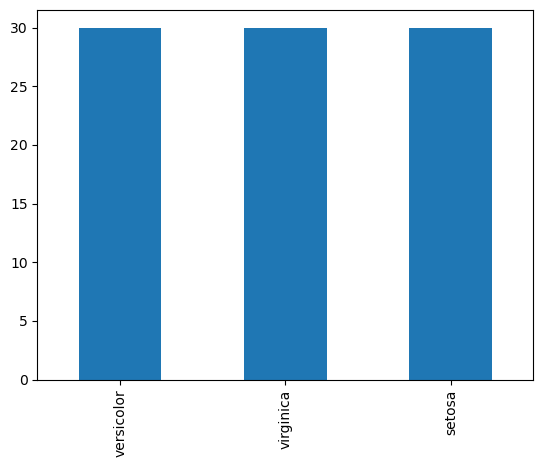

In [88]:
for col in iris_col_cat:
    print(col.upper())
    print(train_iris[col].value_counts())
    print(train_iris[col].value_counts(normalize=True))
    train_iris[col].value_counts().plot.bar()
    plt.show()
    print()

# Takeaways
- No issues, just 30 of each species

SEPAL_LENGTH
5.0    7
6.4    7
5.7    6
5.8    6
5.4    5
6.3    5
5.5    4
6.9    4
5.9    3
4.8    3
4.9    3
5.1    3
7.2    3
6.0    3
6.7    3
5.6    3
6.5    3
6.2    2
6.1    2
5.2    2
4.6    2
7.7    1
6.6    1
7.9    1
6.8    1
5.3    1
4.4    1
7.3    1
7.4    1
7.0    1
4.5    1
4.7    1
Name: sepal_length, dtype: int64
AxesSubplot(0.125,0.11;0.775x0.77)


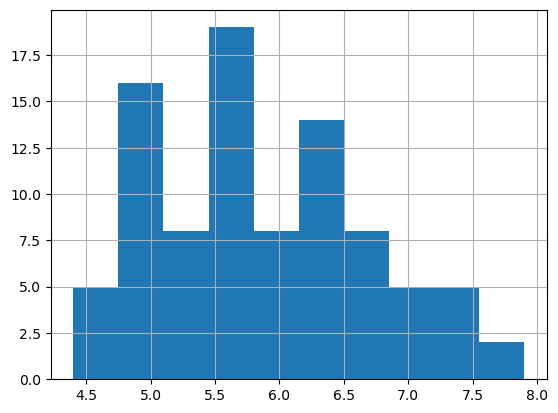

SEPAL_WIDTH
3.0    14
2.8     9
3.2     8
2.7     8
3.4     8
2.9     7
3.1     7
3.8     4
2.6     3
2.3     3
3.5     3
2.5     3
2.4     2
3.6     2
3.3     2
3.9     2
4.4     1
4.1     1
3.7     1
2.2     1
4.0     1
Name: sepal_width, dtype: int64
AxesSubplot(0.125,0.11;0.775x0.77)


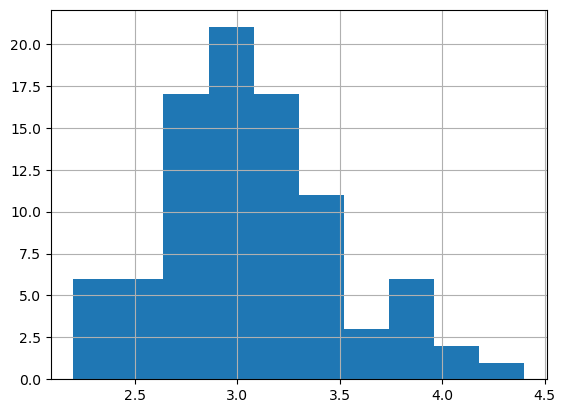

PETAL_LENGTH
1.5    7
1.6    6
5.1    6
1.4    5
4.5    4
1.7    4
4.2    4
5.6    4
1.3    4
3.9    3
5.8    3
4.6    3
4.0    3
1.9    2
5.3    2
5.5    2
1.2    2
4.8    2
6.0    2
4.9    2
4.3    2
6.1    2
5.2    2
4.1    2
4.7    2
5.4    1
5.0    1
6.3    1
3.7    1
4.4    1
3.3    1
3.5    1
5.7    1
6.4    1
6.9    1
Name: petal_length, dtype: int64
AxesSubplot(0.125,0.11;0.775x0.77)


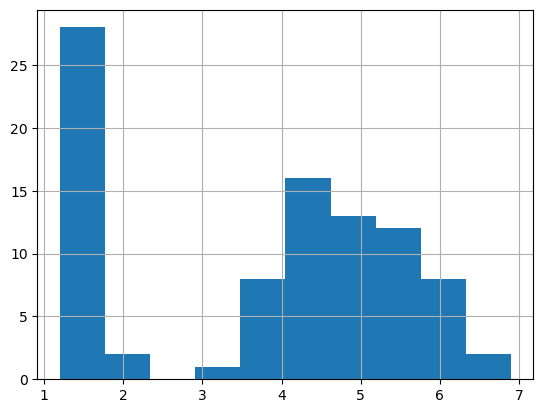

PETAL_WIDTH
0.2    15
1.3    10
1.8     9
1.5     7
0.4     6
2.3     5
1.2     4
0.3     4
1.0     4
1.9     3
1.6     3
1.4     3
2.1     3
0.1     3
2.5     2
2.4     2
2.2     2
2.0     2
0.5     1
0.6     1
1.1     1
Name: petal_width, dtype: int64
AxesSubplot(0.125,0.11;0.775x0.77)


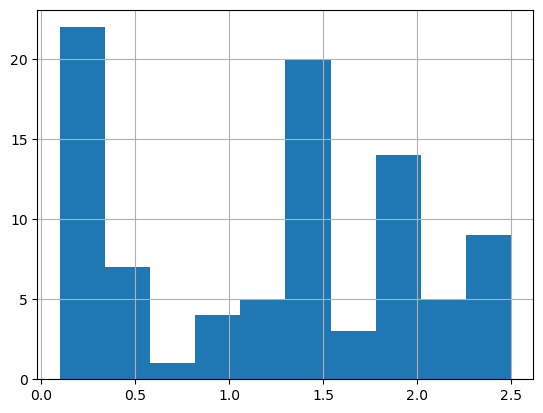

In [89]:
for col in iris_col_num:
    print(col.upper())
    print(train_iris[col].value_counts())
    print(train_iris[col].hist())
    plt.show()

# Takeaways
- Sepal length and sepal width look like almost normal distributions
- Petal length and petal width don't look like normal distributions

In [90]:
train_iris.head()

,Unnamed: 0,species,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
70,70,versicolor,5.9,3.2,4.8,1.8,1,0
123,123,virginica,6.3,2.7,4.9,1.8,0,1
87,87,versicolor,6.3,2.3,4.4,1.3,1,0
3,3,setosa,4.6,3.1,1.5,0.2,0,0
15,15,setosa,5.7,4.4,1.5,0.4,0,0


# Hypothesize
Q: Does Sepal length effect/identify the species type.

What type of variables am I comparing?
    - 4 dimensions to the species

# Visualize

What type of plot should I use?
    - Scatterplot

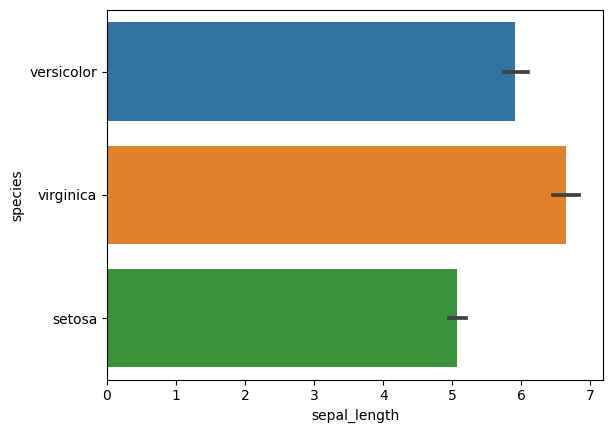

In [93]:
sns.barplot(data=train_iris, x='sepal_length', y='species')
plt.show()

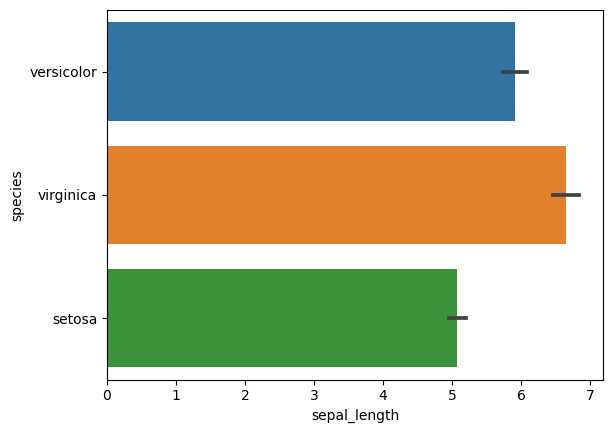

In [94]:
sns.barplot(data=train_iris, x='sepal_length', y='species')
plt.show()

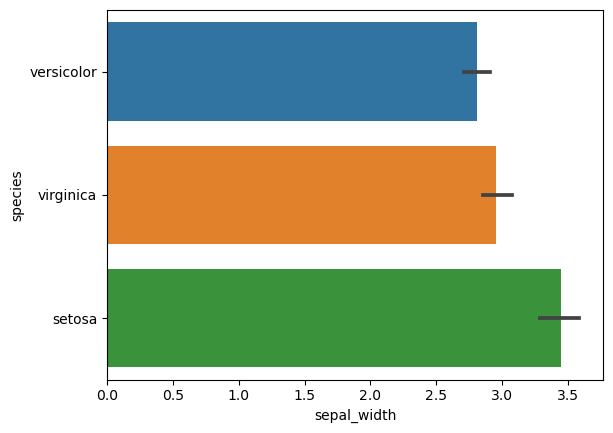

In [95]:
sns.barplot(data=train_iris, x='sepal_width', y='species')
plt.show()

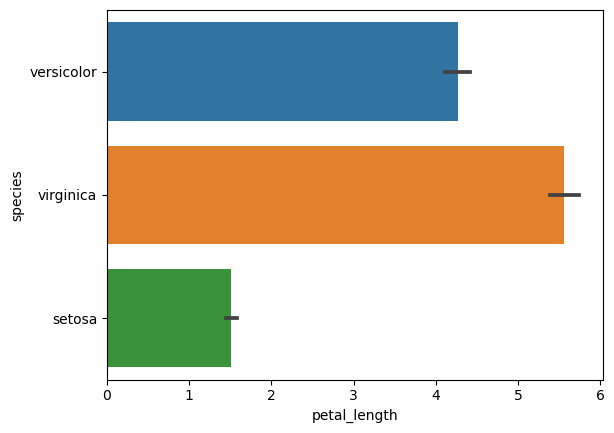

In [96]:
sns.barplot(data=train_iris, x='petal_length', y='species')
plt.show()

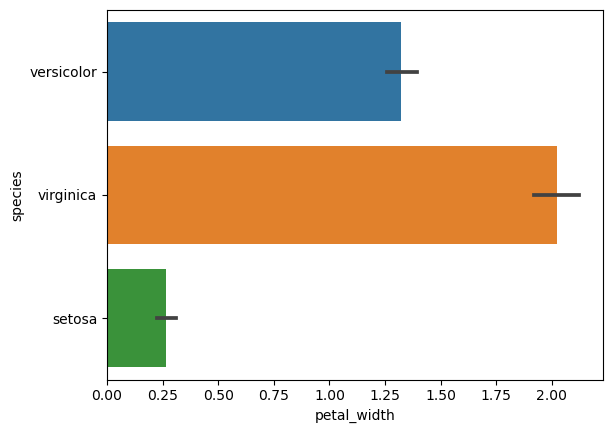

In [97]:
sns.barplot(data=train_iris, x='petal_width', y='species')
plt.show()

# Takeaways
- All four dimensions for the different species show distinct patterns to identify species.

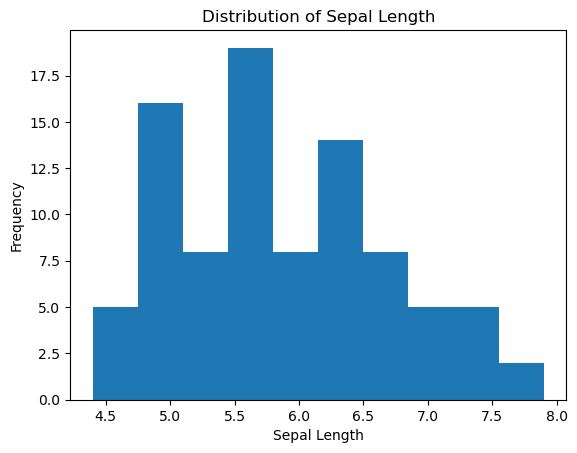

In [99]:
# Create a histogram of the sepal length column
plt.hist(train_iris['sepal_length'], bins=10)

# Set the title and labels
plt.title('Distribution of Sepal Length')
plt.xlabel('Sepal Length')
plt.ylabel('Frequency')

# Show the histogram
plt.show()


Using python and train_iris data, for each measurement type, compute the descriptive statistics for each species.

In [101]:
# Group the data by species
grouped_data = train_iris.groupby('species')

# Loop through each measurement type and compute the descriptive statistics for each species
measurement_types = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

for measurement in measurement_types:
    print('Descriptive statistics for', measurement)
    print('---------------------------------')
    
    for species, data in grouped_data:
        print('Species:', species)
        print('Mean:', data[measurement].mean())
        print('Standard Deviation:', data[measurement].std())
        print('Minimum:', data[measurement].min())
        print('25th Percentile:', stats.scoreatpercentile(data[measurement], 25))
        print('Median:', data[measurement].median())
        print('75th Percentile:', stats.scoreatpercentile(data[measurement], 75))
        print('Maximum:', data[measurement].max())
        print('---------------------------------')



Descriptive statistics for sepal_length
---------------------------------
Species: setosa
Mean: 5.070000000000001
Standard Deviation: 0.3563705936241092
Minimum: 4.4
25th Percentile: 4.824999999999999
Median: 5.0
75th Percentile: 5.375000000000001
Maximum: 5.8
---------------------------------
Species: versicolor
Mean: 5.909999999999998
Standard Deviation: 0.47658989816663416
Minimum: 4.9
25th Percentile: 5.6
Median: 5.8
75th Percentile: 6.175000000000001
Maximum: 7.0
---------------------------------
Species: virginica
Mean: 6.646666666666667
Standard Deviation: 0.5335200822470693
Minimum: 5.8
25th Percentile: 6.3
Median: 6.5
75th Percentile: 6.9
Maximum: 7.9
---------------------------------
Descriptive statistics for sepal_width
---------------------------------
Species: setosa
Mean: 3.4466666666666677
Standard Deviation: 0.42078197592621264
Minimum: 2.3
25th Percentile: 3.2
Median: 3.4
75th Percentile: 3.7749999999999995
Maximum: 4.4
---------------------------------
Species: versi

This code starts by grouping the `train_iris` data by species using `groupby()` method of `pandas`. It then loops through each measurement type and computes the descriptive statistics (mean, standard deviation, minimum, first quartile, median, third quartile, and maximum) for each species using the `mean()`, `std()`, `min()`, `scoreatpercentile()`, `median()`, and `max()` methods of `pandas` and `scipy` libraries. Finally, it prints out the descriptive statistics for each measurement type and species.

Using python and train_iris data... For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

In [ ]:
# Analyze (with stats)
what type of stats test should i use for this?
Mann-Whitney test.

H0: the mean dimensions for each species is the same

Ha: the mean dimensions for each species is different

alpha = 0.05

This code separates the data for virginica and versicolor species from the `train_iris` dataset by using boolean indexing in `pandas`. It then loops through each measurement type and performs the Mann-Whitney U test for each species using the `mannwhitneyu()` method of the `scipy.stats` library. It then prints out the mean values of each species and the p-value of the Mann-Whitney U test for each measurement type, and it also prints out whether there is a significant difference between the two groups or not based on the p-value cutoff of 0.05. You can adjust the p-value cutoff as needed.

In [110]:
# Separate the data for virginica and versicolor species
virginica = train_iris[train_iris['species'] == 'virginica']
versicolor = train_iris[train_iris['species'] == 'versicolor']

# Loop through each measurement type and perform the Mann-Whitney U test for each species
measurement_types = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

for measurement in measurement_types:
    print('Comparison for', measurement)
    print('---------------------------------')
    print('Virginica: Mean =', virginica[measurement].mean())
    print('Versicolor: Mean =', versicolor[measurement].mean())
    
    # Perform the Mann-Whitney U test
    result, p_value = stat.mannwhitneyu(virginica[measurement], versicolor[measurement])
    print('Mann-Whitney U test p-value:', p_value)
    
    if p_value < 0.05:
        print('Result: Significant difference between the two groups\n')
    else:
        print('Result: No significant difference between the two groups\n')


Comparison for sepal_length
---------------------------------
Virginica: Mean = 6.646666666666667
Versicolor: Mean = 5.909999999999998
Mann-Whitney U test p-value: 2.7482419419191076e-06
Result: Significant difference between the two groups

Comparison for sepal_width
---------------------------------
Virginica: Mean = 2.956666666666666
Versicolor: Mean = 2.8066666666666675
Mann-Whitney U test p-value: 0.06370930409956933
Result: No significant difference between the two groups

Comparison for petal_length
---------------------------------
Virginica: Mean = 5.563333333333332
Versicolor: Mean = 4.273333333333334
Mann-Whitney U test p-value: 6.02995793051305e-11
Result: Significant difference between the two groups

Comparison for petal_width
---------------------------------
Virginica: Mean = 2.023333333333333
Versicolor: Mean = 1.32
Mann-Whitney U test p-value: 1.274471779403707e-10
Result: Significant difference between the two groups



For sepal length we reject the null hypothesis
For sepal width we accept the null hypothesis
For petal lenght we reject the null hypothesis
For petal width we reject the null hypothesis

Summary
The mean dimensions for each species is different and distinct enough to identify the species with exception to the sepal width.


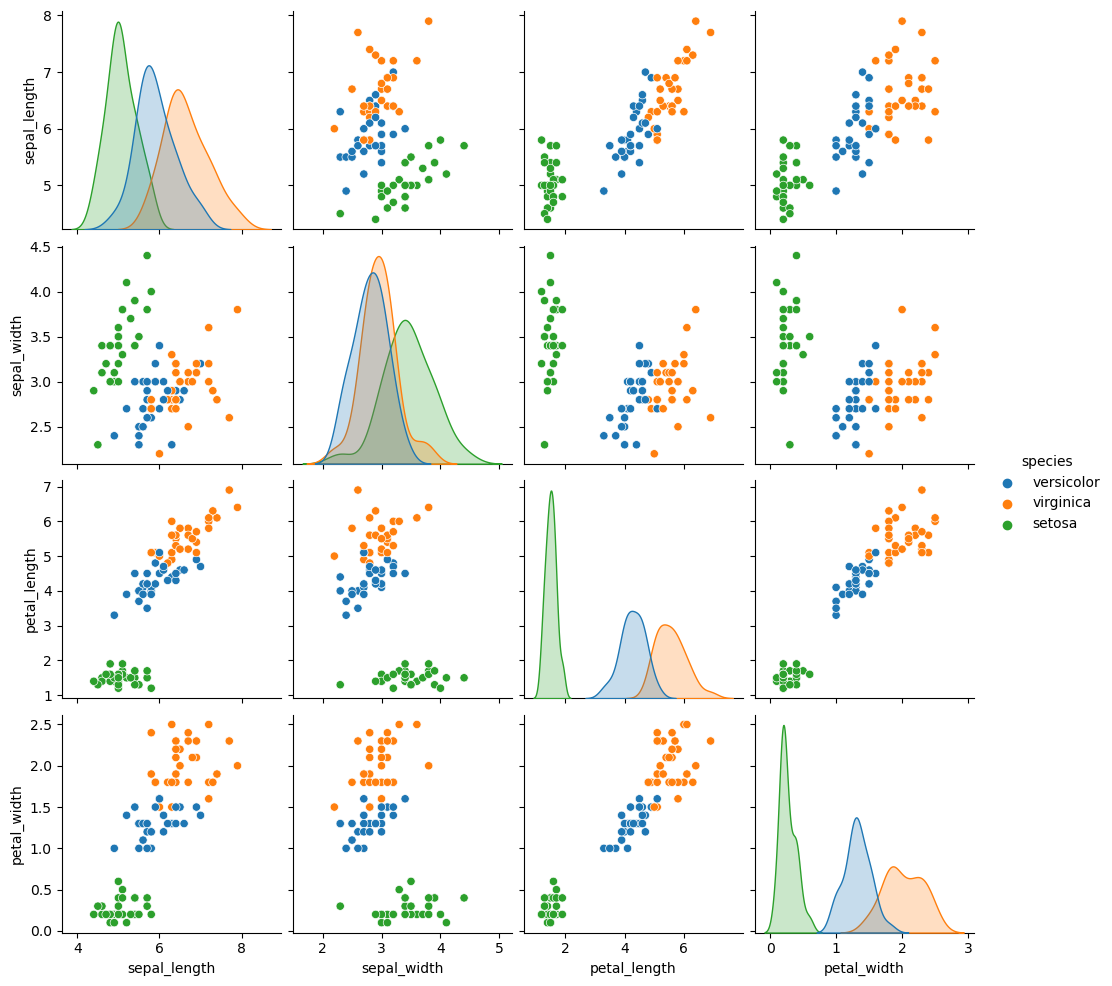

In [113]:
# Create a pairplot of the iris data set with hue set to the species column
sns.pairplot(data=train_iris, hue='species', vars=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

Using python and iris db visualize two numeric variables for each species. Using sns.relplot with hue or col

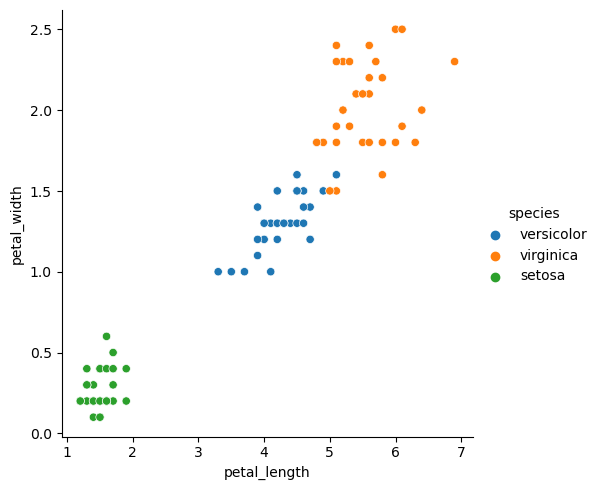

In [115]:
sns.relplot(data=train_iris, x="petal_length", y="petal_width", hue="species")

Using python and iris data is petal_length significantly different in virginica compared to setosa using the best plot and the mann-whitney test.

0.0 2.709796969910182e-11


<AxesSubplot:xlabel='species', ylabel='petal_length'>

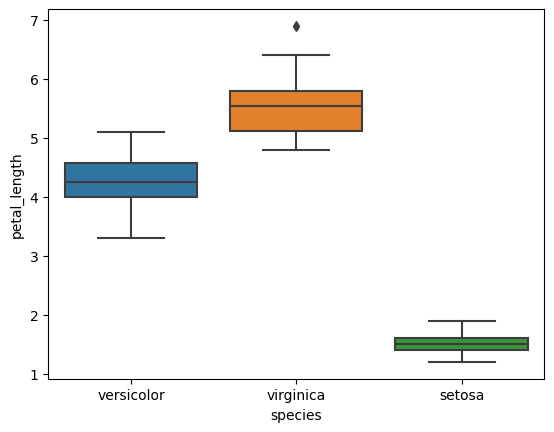

In [122]:
# Filter the dataset to only include setosa and virginica species
setosa = train_iris[train_iris['species'] == 'setosa']
virginica = train_iris[train_iris['species'] == 'virginica']

# Perform the Mann-Whitney U test
stats, p = stat.mannwhitneyu(setosa['petal_length'], virginica['petal_length'])

# Print the results of the Mann-Whitney U test
print (stats, p)

# Create a boxplot to visualize the comparison
sns.boxplot(x='species', y='petal_length', data=train_iris)


We can reject the null hypothesis that there is no difference in petal length.

--------------------------Telco Exploratory---------------------------

In [156]:
train_telco.head()

,Unnamed: 0,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
5911,5911,3,1,2,8319-QBEHW,Male,0,No,Yes,26,...,1,0,0,1,0,0,0,0,0,0
2479,2479,1,3,2,3547-LQRIK,Female,0,Yes,No,47,...,0,1,0,1,0,0,1,0,1,0
5889,5889,2,1,1,8280-MQRQN,Female,0,No,No,1,...,0,0,0,0,0,0,0,0,0,1
6087,6087,3,1,3,8626-PTQGE,Male,0,No,No,69,...,1,0,1,0,1,0,0,0,0,0
785,785,4,2,2,1142-IHLOO,Female,0,No,No,51,...,1,0,1,1,0,1,0,1,0,0
